In [1]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pylab

from scipy.stats import poisson


In [2]:
#read csv file 
train_csv = pd.read_csv("./MLinTheUnknown-Data/X_train.csv", header = None)

# data = pd.read_csv("./real_estate.csv",header =None)
label_csv = pd.read_csv("./MLinTheUnknown-Data/y_train.csv",header = None)

# remove ID and Label
# X_train = train_csv.iloc[:,1:-1]
# y_train = label_csv.iloc[:,-1]

# X_train

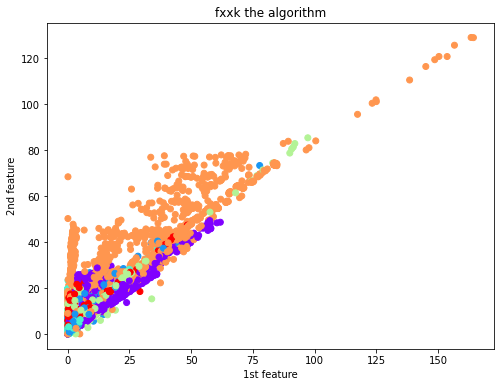

In [3]:
feature1 = train_csv.values[:,2]
feature2 = train_csv.values[:,10]
y = label_csv.values



fig = plt.figure(figsize=(8,6))
plt.scatter(feature1, feature2, marker='o', c=y, cmap='rainbow')#画散点图

plt.title("fxxk the algorithm")#设置标题

plt.xlabel(f"1st feature")#设置x轴标签
plt.ylabel(f"2nd feature")#设置y轴标签
plt.show()#显示所画的图

In [4]:
# 检测是否有空数据
print(train_csv[train_csv.isnull()].count(axis=1).sum())
print()
print(train_csv[train_csv.isnull()].count(axis=0).sum())

0

0


In [5]:
train_csv.describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,...,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000,8346.000000
mean,49902.609741,6.686965,12.823958,18.563598,26.485375,-9.074637,-14.252376,-58.334105,56761.199769,6.734881,...,-9.543014,-18.853061,19614.576609,6.038451,7.115541,14.916599,19.033853,-4.874019,-8.116945,-15.877982
std,68758.941403,16.299765,17.434447,24.649256,36.984625,12.544882,20.958158,126.214807,63146.172361,19.548788,...,9.055470,25.366938,14165.919618,4.533910,5.206196,12.536898,14.227420,4.123172,7.505155,20.198504
min,-16757.598600,0.088287,0.000100,0.000100,0.000100,-127.407470,-202.753097,-1555.550631,-16119.460900,0.486850,...,-76.069200,-442.004780,-8297.548800,0.712112,0.003238,0.025355,0.202822,-30.205911,-58.773503,-410.152297
25%,6703.926650,2.282439,1.617982,2.362283,4.937769,-11.558429,-17.169820,-48.275356,13213.210225,2.768536,...,-13.058462,-22.194101,8827.804825,3.013723,3.054586,5.419981,8.024146,-6.699913,-11.035601,-18.753124
50%,19188.954000,3.804842,4.936646,7.239355,11.638708,-3.350116,-4.964689,-13.993678,37556.756100,4.720517,...,-7.369146,-13.559079,16328.503000,4.984083,5.804854,11.328677,14.580219,-3.890385,-6.331554,-11.736492
75%,62472.877800,8.438259,17.145460,26.085503,34.549582,-1.121579,-1.675425,-5.205338,69941.130150,8.631187,...,-3.277017,-7.385239,26739.542550,7.373897,10.205102,21.233618,26.503304,-1.810972,-2.893410,-6.471679
max,668677.085900,1339.879283,164.257913,221.558494,664.208067,-0.021669,-0.109067,-0.475184,502202.812500,1672.363221,...,-0.136892,-0.372947,90328.637700,40.470570,31.835214,297.225880,97.042997,-0.016275,-0.062814,-0.528959


In [6]:
# print(train_csv.head(n=5))
# print
# print(train_csv.tail(n=5))

In [7]:
# # 第一列数据分布图
# from scipy.stats import poisson

# for i in range(128):
#     # norm or possion
#     stats.probplot(train_csv.iloc [:,i], dist= 'norm', plot=pylab)

#     #设置x轴的标签
#     pylab.xlabel(f"feature{i}")
#     pylab.ylabel("values")
#     #设置标题
#     pylab.title(f"Data in No.{i} column.")
    
#     pylab.show()

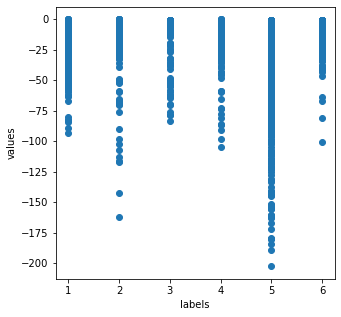

In [8]:
#  分析feature和label之间的关系
import random
# for i in range(8346):
#     if train_csv.iloc[i,128] == 1.0:
#         train_csv.iloc[i,128] = 1.0 + random.uniform(-0.1,0.1)
#     if train_csv.iloc[i,128] == 2.0:
#         train_csv.iloc[i,128] = 2.0 + random.uniform(-0.1,0.1)
#     if train_csv.iloc[i,128] == 3.0:
#         train_csv.iloc[i,128] = 3.0 + random.uniform(-0.1,0.1)
#     if train_csv.iloc[i,128] == 4.0:
#         train_csv.iloc[i,128] = 4.0 + random.uniform(-0.1,0.1)
#     if train_csv.iloc[i,128] == 5.0:
#         train_csv.iloc[i,128] = 5.0 + random.uniform(-0.1,0.1)
#     if train_csv.iloc[i,128] == 6.0:
#         train_csv.iloc[i,128] = 6.0 + random.uniform(-0.1,0.1)
    
plt.figure(figsize=(5,5))

plt.scatter(label_csv.iloc[:,0], train_csv.iloc[:,6])
plt.xlabel("labels")
plt.ylabel("values")
plt.show()

In [9]:
data3 =  pd.DataFrame(columns= train_csv.columns)
data6 =  pd.DataFrame(columns= train_csv.columns)

for i in range(8346):
    if label_csv.iloc [i,0] == 3.0:  
        data3 = data3.append(train_csv.iloc[i,0:128])
    if label_csv.iloc [i,0] == 6.0:
        data6 = data6.append(train_csv.iloc[i,0:128])
    else:
        continue


In [10]:
data3.describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,...,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,6911.259062,2.485173,1.824973,2.707124,4.948963,-2.202417,-3.514263,-17.536085,11726.744938,3.182590,...,-5.344829,-11.460769,10339.568111,3.901912,3.967758,7.047260,9.866356,-2.689317,-4.608505,-9.546988
std,8089.943517,1.807065,2.313404,3.411968,4.080040,5.209673,9.364085,73.585890,10237.994604,1.528475,...,7.551011,18.974778,4761.407564,2.287223,2.532618,5.433608,6.070222,3.402729,6.403755,14.267243
min,-223.761500,0.088287,0.021995,0.171450,1.223247,-41.516818,-83.611446,-705.761700,336.361400,1.022813,...,-65.791874,-197.475637,616.902400,1.026784,0.363894,0.531212,1.028419,-28.938956,-55.543544,-152.099807
25%,1542.473750,1.560366,0.399988,0.755312,3.056801,-1.802957,-2.498001,-6.757760,6991.016675,2.301015,...,-5.794722,-10.323062,7346.502175,2.317972,1.992849,2.791809,5.506138,-3.004602,-5.033345,-8.992681
50%,5757.577700,2.120150,1.476866,2.126268,4.184228,-1.013536,-1.534361,-4.095058,10270.422100,2.964964,...,-3.779500,-7.405330,9701.660400,2.913721,3.474865,5.484927,7.812988,-2.019557,-3.246105,-6.356450
75%,9868.446775,2.802847,2.389189,3.425357,6.002467,-0.371058,-0.725277,-3.031037,14313.067500,3.659583,...,-2.286725,-5.600110,13370.536050,4.937696,5.435687,8.938928,11.759518,-1.273632,-2.010204,-4.912399
max,128530.945300,38.834611,36.048287,56.060567,74.617198,-0.023842,-0.231386,-1.182951,126770.078200,17.030293,...,-0.503556,-1.557392,35375.648400,25.919982,15.171927,30.235599,35.851670,-0.172431,-0.442453,-1.196215


In [11]:
data3

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
9,16085.9394,4.862015,4.030748,5.474943,5.949715,-2.735724,-3.604334,-5.351280,18486.9815,4.925488,...,-5.588096,-8.092442,12942.6992,2.708409,4.368565,6.525490,7.759071,-3.072188,-4.748223,-6.993717
11,2690.8535,1.449724,0.637701,1.116784,6.245729,-0.383646,-0.794811,-4.509839,4787.5571,1.937117,...,-2.213706,-6.491453,6360.3639,4.553743,2.025035,3.096234,7.137158,-1.065016,-1.952164,-7.434031
13,7169.2642,2.243287,2.382099,3.430725,5.475827,-3.738558,-4.745162,-11.342793,15245.4649,3.784016,...,-10.226818,-21.235260,16970.7062,9.395662,8.541499,17.210350,21.051608,-4.713935,-8.339277,-13.900315
17,1283.4840,1.718941,0.279683,0.623591,2.882678,-0.218512,-0.543700,-3.301205,8104.7959,2.438859,...,-1.943127,-5.582179,5820.4009,2.010715,1.502648,2.606418,5.542299,-1.044400,-1.678213,-5.334690
20,72.7344,1.019377,0.221580,0.628835,3.395666,-0.433649,-0.867708,-4.034022,8357.9399,2.300190,...,-4.529739,-9.337980,12534.8899,4.384533,5.176255,8.602901,12.313297,-2.370583,-4.074164,-8.613517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8303,18004.0039,3.559390,4.807570,6.464098,7.526985,-2.999281,-4.142756,-6.593693,17806.6010,4.029565,...,-5.519522,-8.622817,14462.5889,3.216333,5.846864,9.829240,11.154217,-3.004609,-4.750017,-7.538150
8306,1990.1272,1.680969,0.489468,0.927885,3.698605,-0.488959,-0.932018,-4.381998,12775.3652,2.963785,...,-4.523692,-8.835550,10751.9883,2.730859,4.274568,6.977846,9.543819,-2.459652,-3.915425,-8.172254
8314,10137.8145,1.566258,2.274793,3.306592,7.254913,-3.003595,-4.205753,-5.164063,10264.1397,1.722903,...,-4.124480,-4.973888,16612.5442,5.733550,5.770069,10.963085,16.731349,-2.223825,-3.458920,-4.194576
8323,18005.5561,3.539937,5.081543,8.738731,11.935810,-2.579440,-3.558211,-9.455839,19427.7080,3.523603,...,-4.758804,-7.983677,11648.5830,3.339641,4.179328,6.752684,8.450429,-2.573698,-4.099832,-6.642616


In [12]:
delete_index3 = []
for n in range(128):
    # 3 sigma
    
    mean = data3.iloc[:,n].mean()
    std = data3.iloc[:,n].std()
    
    # 分位差 
#     Q1 = data3.iloc[:,n].quantile(q=0.25)
#     Q3 = data3.iloc[:,n].quantile(q=0.75)
#     IQR = Q3-Q1
    
    for i,m in enumerate(data3.index): 
        
#         if data3.iloc[i,n] > (Q3 + 1.5*IQR) or data3.iloc[i,n] < (Q1 - 1.5*IQR):
            
        if data3.iloc[i,n] > (mean+ 3*std) or data3.iloc[i,n] < (mean - 3*std):
            delete_index3.append(m)

delete_index3 = list(sorted(set(delete_index3)))


# 分位差 
# Q3+1.5*(Q3-Q1)
# Q3 - 1.5*(Q3-Q1)



In [13]:
len(delete_index3)

120

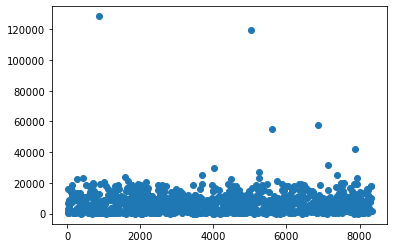

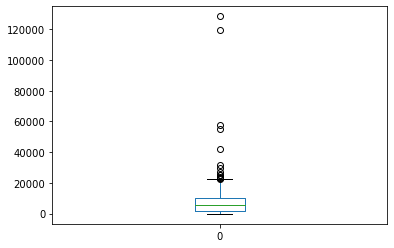

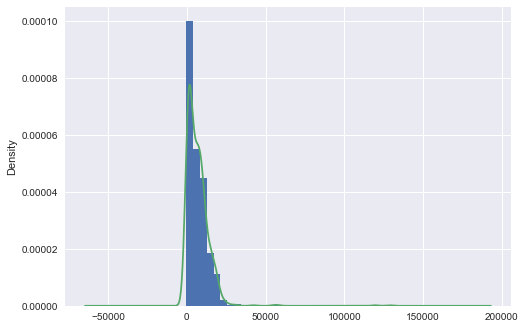

In [14]:
plt.scatter(data3.index, data3.iloc[:,0])
plt.show()
data3.iloc[:,0].plot(kind="box")
plt.show()
plt.style.use('seaborn')

data3.iloc[:,0].plot(kind='hist', bins=30, density = True)
data3.iloc[:,0].plot(kind='kde')
plt.show()


In [15]:
delete_index6 = []
for n in range(128):
    # get the mean of n column of data6(class 6.0)
    mean = data6.iloc[:,n].mean()
    std = data6.iloc[:,n].std()
    
#     Q1 = data3.iloc[:,n].quantile(q=0.25)
#     Q3 = data3.iloc[:,n].quantile(q=0.75)
#     IQR = Q3-Q1
    
    for i,m in enumerate(data6.index): 
        if data6.iloc[i,n] > (mean+ 3*std) or data6.iloc[i,n] < (mean - 3*std):
#         if data6.iloc[i,n] > (Q3+ 1.5*IQR) or data6.iloc[i,n] < (Q1 - 1.5*IQR):
            delete_index6.append(m)

delete_index6 = list(sorted(set(delete_index6)))

In [16]:
len(delete_index6)

137

In [17]:
del_3_6 = delete_index3+ delete_index6
del_3_6 = list(sorted(set(del_3_6)))
len(del_3_6)

257

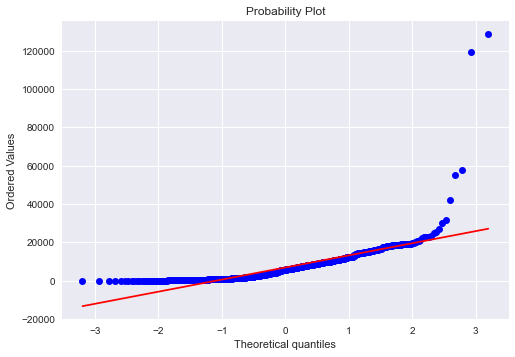

In [18]:
# plt.scatter(data3.index, data3.iloc[:,1])
# for i in range(128):

stats.probplot(data3.iloc [:,0], dist="norm",plot=pylab)

pylab.show()

In [19]:
 train_csv.iloc[:,1].values

array([ 4.649028,  1.21617 , 10.76348 , ..., 34.267652,  2.244089,
        7.839886])

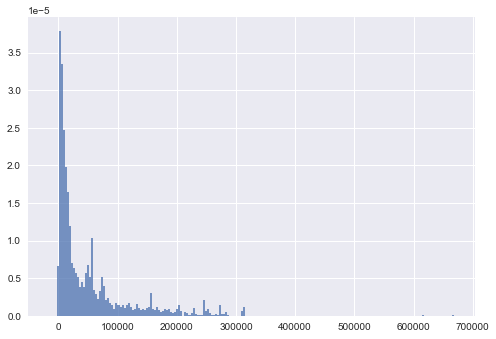

In [20]:

dist = train_csv.iloc[:,0]
# sns.set_style('darkgrid')
# sns.distplot(dist,bins=1000)

dist = dist.values

fig = plt.figure()
ax = fig.add_subplot()
ax.hist(dist, bins=200, density =True, alpha=0.75 , range=(min(dist),max(dist)))

plt.show()



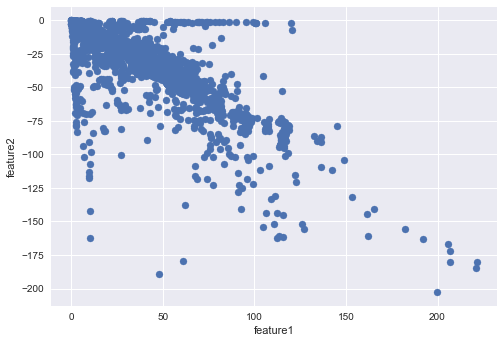

In [21]:
plt.scatter(train_csv.iloc[:,3],train_csv.iloc[:,6])

plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()


In [22]:
# 使用平行坐标图来寻找重要特征
# 平行坐标图(parallel coordinates plot)用来可视化具有多个属性的数据。
# 平行坐标图是由一条一条的折线所组成的，每条折线表示一条数据，折线上的折点表示这条数据在该个属性值上的取值。

# plt.figure(figsize=(12,8))
# for i in range(8346):

#     if label_csv.iloc [i,0] == 3.0:
#         line_color = 'Red'
#     elif label_csv.iloc [i,0] == 6.0:
#         line_color = 'Blue'
#     else:
#         continue
        
#     data_attribute = train_csv.iloc[i,0:128]
    
#     data_attribute.plot(color = line_color)


# plt.xlabel("features")
# plt.ylabel("events")
# plt.title("parallel coordinates plot")
# plt.show()
        
        

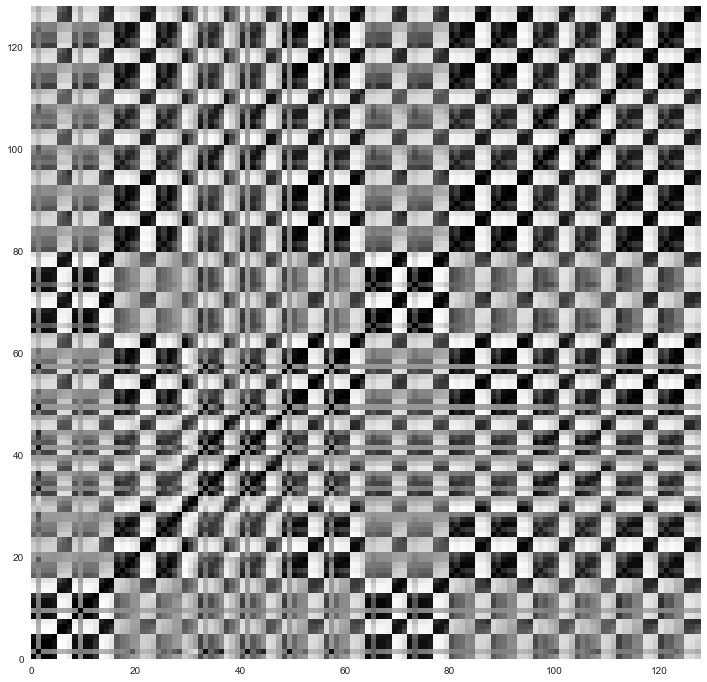

In [23]:
# 热图
#获取相关系数矩阵
plt.figure(figsize=(12,12))
corrMat = train_csv.corr()
plt.pcolor(corrMat)
plt.show()

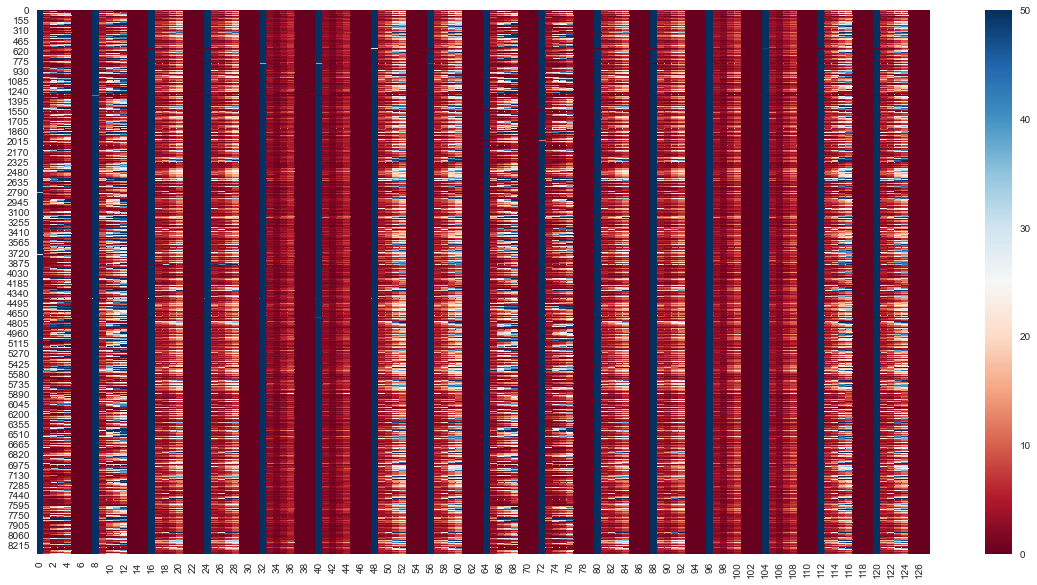

In [24]:
plt.figure(figsize=(20,10))

data1 = train_csv.values
           
ax = sns.heatmap(data1, cmap = 'RdBu',vmin=0, vmax=50)
# , cmap="YlGnBu", annot=True, vmin=0, vmax=1,fmt ='0.1g'

In [25]:
# corr = train_csv.corr()
# corr  = np.corrcoef(train_csv.values,rowvar=0)*0.5+0.5
corr  = np.corrcoef(train_csv.values,rowvar=0)
# 应用公式0.5*value+0.5可以将相关系数矩阵的值域由[-1,1]映射为[0,1]
corr


array([[ 1.        ,  0.16295256,  0.98403304, ..., -0.51688095,
        -0.46880098, -0.32094742],
       [ 0.16295256,  1.        ,  0.18407947, ..., -0.20352831,
        -0.18661737, -0.10620424],
       [ 0.98403304,  0.18407947,  1.        , ..., -0.55327242,
        -0.50531851, -0.34880677],
       ...,
       [-0.51688095, -0.20352831, -0.55327242, ...,  1.        ,
         0.96635364,  0.73445526],
       [-0.46880098, -0.18661737, -0.50531851, ...,  0.96635364,
         1.        ,  0.84866788],
       [-0.32094742, -0.10620424, -0.34880677, ...,  0.73445526,
         0.84866788,  1.        ]])

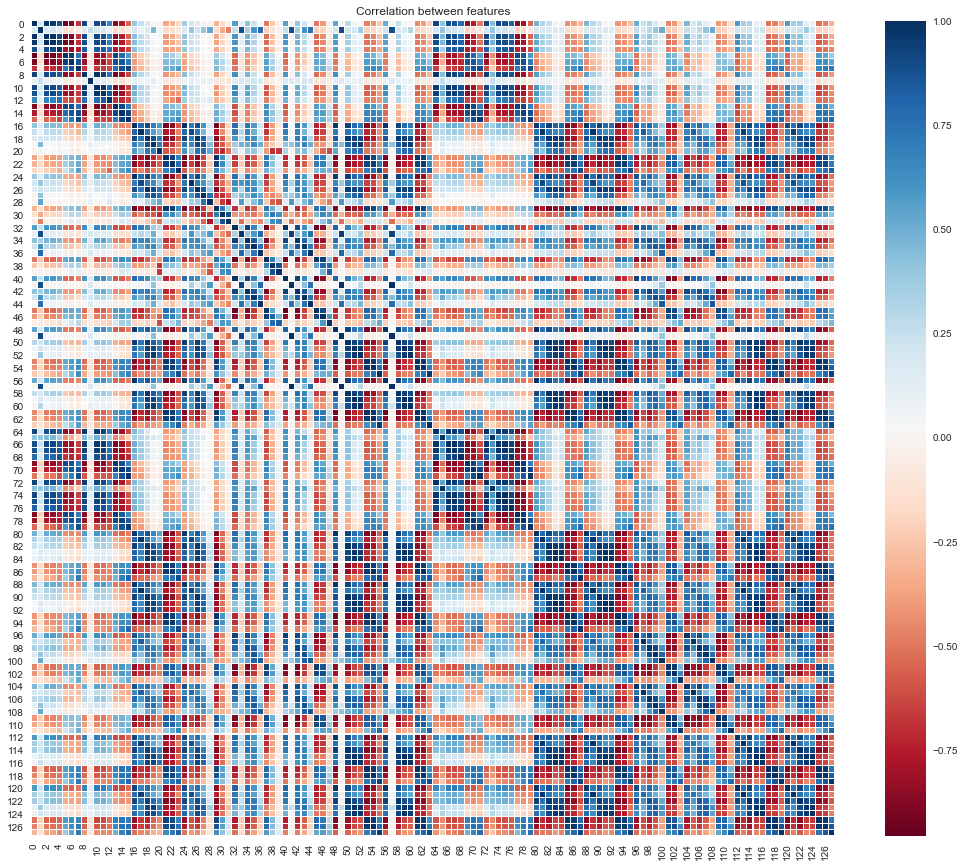

In [26]:
f,ax = plt.subplots(figsize = (18, 15))

sns.heatmap(corr, cmap='RdBu', linewidths = 0.05, ax =ax)

# , vmin=0, vmax=1
plt.title('Correlation between features')
# plt.show()

f.savefig('corr.png', dpi=100, bbox_inches='tight')




In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

print("X_train")
X_train = pd.read_csv("./MLinTheUnknown-Data/X_train.csv", header=None)
print(X_train)
print()

print("y_train")
y_train = pd.read_csv("./MLinTheUnknown-Data/y_train.csv", header=None).values.ravel()
print(y_train.shape)
print()

print("X_val")
X_test = pd.read_csv("./MLinTheUnknown-Data/X_val.csv", header=None)
print(X_test)
print()

print("y_val")
y_test = pd.read_csv("./MLinTheUnknown-Data/y_val.csv", header=None).values.ravel()
print(y_test.shape)
print()

clf = PCA(n_components=11)
clf.fit(X_train)

Xtrain = clf.transform(X_train)
print(Xtrain.shape)

Xtest = clf.transform(X_test)
print(Xtest.shape)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain, y_train)

print(Xtrain.shape, Xtest.shape)
y_pred = knn.predict(Xtest)
print(y_pred.shape)


rpt = classification_report(y_test, y_pred)
print(rpt)

X_train
              0          1          2          3          4          5    \
0      10549.4970   4.649028   2.167022   2.752811   3.352847  -1.795881   
1       2255.0098   1.216170   0.783855   2.127426   7.283419  -0.724791   
2      73262.9595  10.763480  20.882685  31.113756  33.561047 -14.626887   
3      44069.7910   5.043857  11.894705  16.865917  29.003995  -8.874675   
4       6860.3404   2.485188   2.068429   3.070743   7.140745  -1.159993   
...           ...        ...        ...        ...        ...        ...   
8341   45169.9385  10.340504  14.368336  23.764614  29.876741  -9.526939   
8342    1500.6678   1.989343   0.399651   0.759032   3.319534  -0.370875   
8343  119398.0036  34.267652  36.981924  57.312780  61.439555 -27.339333   
8344     456.5752   2.244089   0.105823   0.322010   2.642211  -0.048703   
8345   55180.0962   7.839886  16.927187  27.325292  36.018002 -22.046201   

            6           7            8          9    ...        118  \
0     -2